In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn as skl

# **Utils:**

In [2]:
def imprimir_titulo_ejercicio(x):
    print('=======================================================================')
    print('Ejercicio ',x)
    print('=======================================================================')

#===================================================================================

# Parte del Ejercicio 4
    
# Creo una clase que se encargue de realizar la regresion lineal y las predicciones
class regressor:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit_LinearRegresion(self,X,Y):
        output_dim = Y.shape[1]
        X = np.hstack(( np.ones((X.shape[0],1)) , X ))    
        X_dagger = np.linalg.pinv(X)
        W = np.dot(X_dagger,Y)
        if output_dim == 1:
            self.weights =np.squeeze(W[output_dim:])
            self.bias = np.squeeze(W[:output_dim])
        else:
            self.weights =np.squeeze(W[output_dim-1:])
            self.bias = np.squeeze(W[:output_dim-1])
            
    def predict(self,x):
        linear_output = np.dot(x, self.weights) + self.bias
        return linear_output
    
    def test(self,X,y):
        n_samples,n_features = X.shape
        test_results = np.zeros(n_samples)
        Y_pred = self.predict(X)
        mse = np.mean((Y_pred - y)**2) 
        return mse

# **Ejercicio 1**

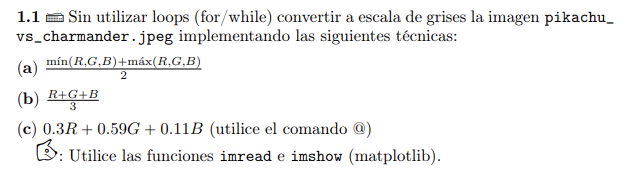

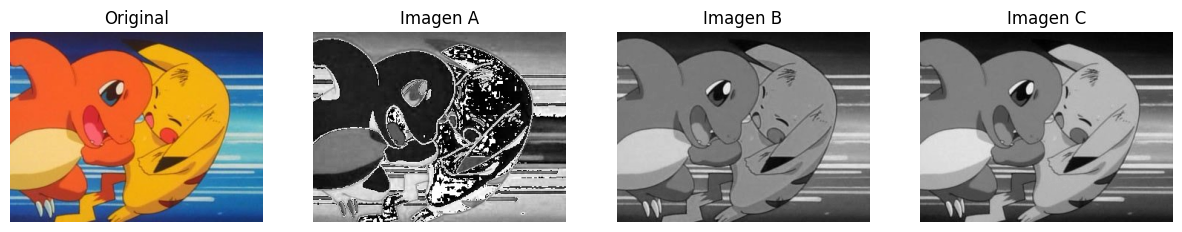

In [3]:
# Cargo la imagen 
imagen =np.array(mpimg.imread('pikachu_vs_charmander.jpeg'))

#=======================================================================
# Imagen A
#=======================================================================


# Busco el maximo y el minimo de cada de cada pixel RGB obteniendo dos matrices de las mismas dimensiones que la imagen original
min_rgb = np.min(imagen,axis = 2)
max_rgb = np.max(imagen,axis = 2)

# Armo la imagen en escala de grises haciendo un promedio entre los valores maximos y minomos de RGB de cada pixel
imagen_a = (max_rgb + min_rgb)/2


#=======================================================================
# Imagen B
#=======================================================================
# Armo la imagen B calculando el promedio de las componentes RGB de cada pixel 
imagen_b = np.mean(imagen,axis = 2)


#=======================================================================
# Imagen C
#=======================================================================
# Resolvi este ejercicios de dos formas distintas.

# La primera indexando sobre el numpy array obteniendo cada matriz y luego sumandolas con sus correspondientes pesos.
imagen_c = 0.3 * imagen[:,:,0] + 0.59 * imagen[:,:,1] + 0.11 * imagen[:,:,2]

# La segunda haciendo un producto de matricez tal que se sumen las matricez de R, G y B con los pesos indicados.
imagen_c = imagen @ np.array([0.3,0.59,0.11])


#=======================================================================
# Resultados
#=======================================================================
# Grafico las imagenes obtenidas

imagenes = [imagen,imagen_a,imagen_b,imagen_c]
imagenes_labels = ['Original','Imagen A','Imagen B','Imagen C']
imagenes_cmap = ['viridis','gray','gray','gray']

fig = plt.figure(figsize=(15, 15))

for i,(img,legend,colormap) in enumerate(zip(imagenes,imagenes_labels,imagenes_cmap)):
    f= plt.subplot(1,len(imagenes),i+1)
    plt.imshow(img,cmap = colormap)
    plt.axis('off')
    plt.title(legend)

plt.show()

# **Ejercicio 2**

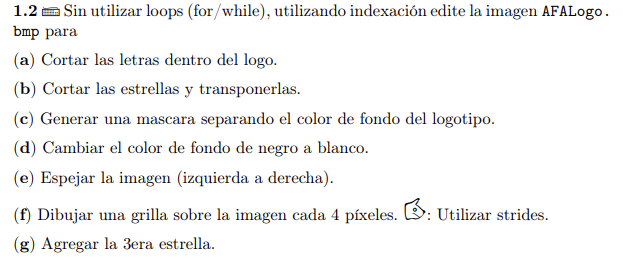

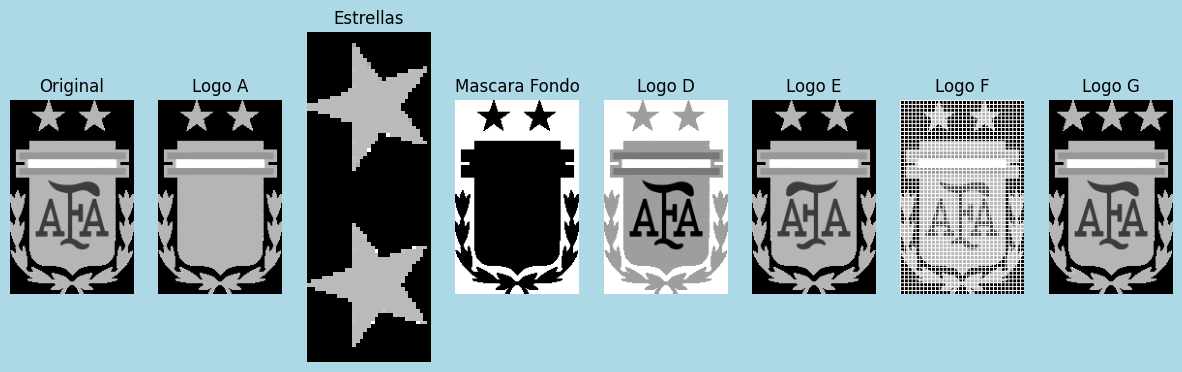

In [4]:
# Estos ejercicios se resolvieron utilizando indexacion y operaciones logicas, en el caso de la mascara del fondo.

# Cargo el logo original 
logo_afa =np.array(mpimg.imread('AFALogo.bmp'))

#=======================================================================
# Ejercicio A
#=======================================================================

logo_afa_a = np.copy(logo_afa)
logo_afa_a[80:160,25:128 - 25] = logo_afa_a[120,24]


#=======================================================================
# Ejercicio B
#=======================================================================

estrellas = logo_afa[0:33,20:128-20].T

#=======================================================================
# Ejercicio C
#=======================================================================
mascara_fondo = logo_afa == 0 

#=======================================================================
# Ejercicio D
#=======================================================================
logo_afa_d = logo_afa + 255*mascara_fondo


#=======================================================================
# Ejercicio E
#=======================================================================
logo_afa_e = np.flip(logo_afa,axis = 1)

#=======================================================================
# Ejercicio F
#=======================================================================
logo_afa_f = np.copy(logo_afa)
logo_afa_f[:,::4] = 255
logo_afa_f[::4,:] = 255


#=======================================================================
# Ejercicio G
#=======================================================================
logo_afa_g =np.copy(logo_afa) 

# Recorto una estrella
estrella = np.copy(logo_afa[0:32,20:60])

# Elimino las estrellas del logo
logo_afa_g[0:32,:] = 0

# Agrego las estrellas
logo_afa_g[0:32,5:5+40] = estrella
logo_afa_g[0:32,45:45+40] = estrella
logo_afa_g[0:32,85:85+40] = estrella


#=======================================================================
# Resultados
#=======================================================================
# Grafico las imagenes obtenidas

imagenes_ejercicio_2 = [logo_afa,logo_afa_a,estrellas,255 * mascara_fondo,logo_afa_d,logo_afa_e,logo_afa_f,logo_afa_g]

imagenes_ejercicio_2_labels = ['Original','Logo A','Estrellas','Mascara Fondo','Logo D','Logo E','Logo F','Logo G']

fig = plt.figure(figsize=(15, 15),facecolor='lightblue')

for i,(img,label) in enumerate(zip(imagenes_ejercicio_2,imagenes_ejercicio_2_labels)):
    f= plt.subplot(1,len(imagenes_ejercicio_2),i+1)
    plt.imshow(img,cmap = 'gray')
    plt.axis('off')
    plt.title(label)

plt.show()

# **Ejercicio 3**
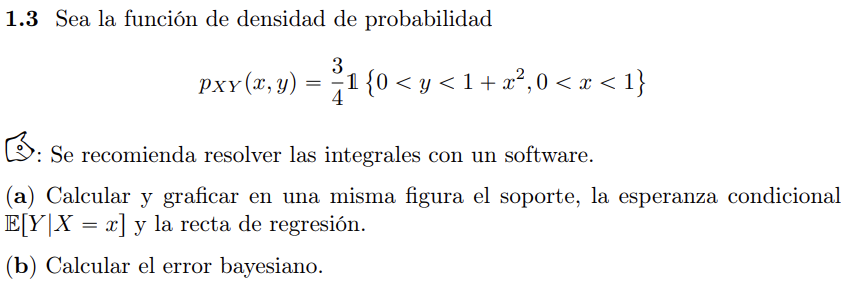

a)
Para calcular la funcion de regresion o esperanza condicional $\phi(x) = \mathbb{E}[Y|X=x]$, primero necesito encontrar la funcion de densidad $f_{Y|X=x}(y)$. Luego, aplicando el operador esperanza: $$\mathbb{E}[Y|X=x] = \int_{-\infty}^{\infty} y \cdot f_{Y|X=x}(y) dy $$ 

Para ello uso la siguiente propiedad: $$ f_{Y|X=x}(y) = \frac{f_{XY}(x,y)}{f_X(x)}$$
La densidad marginal de X es: $$f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x,y) dy = \int_{0}^{1+x^2} \frac{3}{4}  \cdot \mathbb{1} \{0<x<1\} dy=\frac{3}{4} (1+x^2) \cdot \mathbb{1} \{0<x<1\}$$ 
Entonces, la funcion de densidad buscada es: $$f_{Y|X=x}(y) = \frac{1}{1+x^2} \cdot \mathbb{1} \{0<y<1+x^2\}$$
Luego aplicando el operador esperanza a la variable aleatoria $Y|X=x$ se obtiene la funcion de regresion. Se puede observar que dicha variable aleatoria tiene una distribucion uniforme $\mathcal{U}(a = 0,b = 1+x^2)$ y por lo tanto: $$\phi (x) = \mathbb{E}[Y|X=x] = \frac{x^2 + 1}{2}$$

Por otro lado, para obtener la recta de regresion uso la ecuacion correspondiente: $$l(x) = \frac{\sigma_{yx}}{\sigma_{x}^2} \cdot (x - \mu_x) + \mu_y$$
Utilizando un software para resolver las integrales.

* $\mu_x = \mathbb{E}[x] = \int^{\infty}_{\infty} f_X(x) \cdot  x dx= 0.5625$
* $\mu_y = \mathbb{E}[y] = \int^{\infty}_{\infty} f_Y(y) \cdot  x dx= 0.7$
* $\sigma_{yx} = \mathbb{E}[(x-\mu_x)\cdot(y-\mu_y)]= \mathbb{E}[xy] - \mu_x \cdot \mu_y = \int^{\infty}_{\infty} \int^{\infty}_{\infty} f_{XY}(x,y)dxdy = 0.4375 - 0.7 \cdot 0.5625 = 0.0475$
* $\sigma_x^2 = \mathbb{E}[(x-\mu_x)^2] = \int^{\infty}_{\infty} f_X(x) \cdot (x-\mu_x)^2 dx = 0.4$

En el codigo de abajo se graficaron ambas curvas obtenidas y se marco el soborte de la funcion de densidad conjunta.

b) Como ya se conozco la distribucion de $Y|X=x$ simplemente utilizo la formula conocida para calcular su varianza: $$\mathbb{V}[Y|X] = \frac{(x^2+1)^2}{12} = \frac{X^4 + 2 \cdot X^2 + 1}{12}$$
Luego tomando esperanza se obtiene el error bayesiano: $$\mathbb{E}[\mathbb{V}[Y|X]] = \frac{\mathbb{E}[X^4] + 2\cdot\mathbb{E}[X^2] + 1}{12} = 0.17$$



El error estimado es  0.1671988303977399


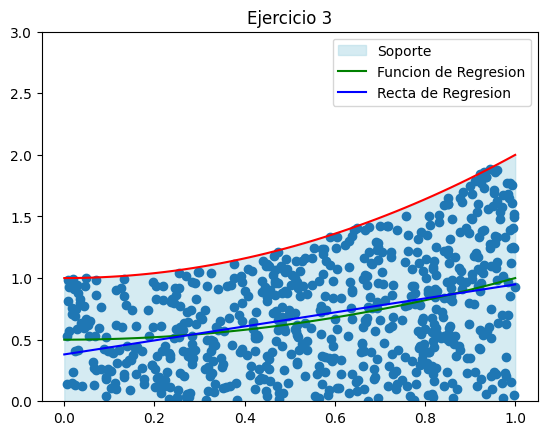

In [5]:
from scipy.integrate import quad

plt.figure()
plt.title('Ejercicio 3')

# Grafico el soporte del vector aleatorio
x = np.linspace(0,1)
y = 1 + x**2
plt.plot(x,y,color='red')
plt.fill_between(x, y, color='lightblue', alpha=0.5 , label = 'Soporte')

# Genero y grafico la funcion de regresion/esperanza condicional
funcion_regresion = (1/2)*x**2 + 1/2
plt.plot(x,funcion_regresion,color='green',label= 'Funcion de Regresion')

# Idem para la recta de regresion
mu_x = 0.5625
mu_y = 7/10
cov_xy=0.0475
var_x = 0.08359

regression_line = (cov_xy/var_x) * (x - mu_x) + mu_y

plt.plot(x,regression_line,color='blue', label = 'Recta de Regresion')

# Genero muestras con distribucion uniforme en dicho soporte:
data = np.random.uniform([0,0],[1,2],size = (1000,2))
for i,(a,b) in enumerate(data):
    if b > 1+a**2:
        data[i] = np.nan
plt.scatter(data[:,0],data[:,1])

data= data.flatten()[~np.isnan(data.flatten())].reshape(-1,2)
error = np.mean((data[:,1] - ((1/2)*data[:,0]**2 + 1/2))**2)
print('El error estimado es ', error)

plt.ylim(0, 3)
plt.legend()
plt.show()

# **Ejercicio 4**
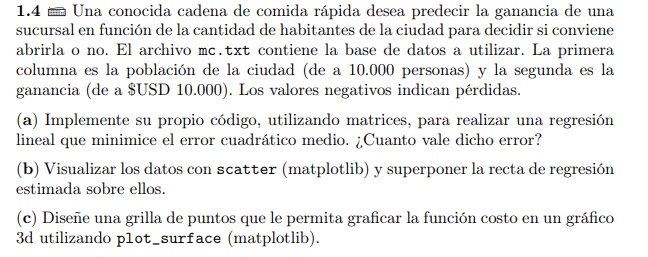
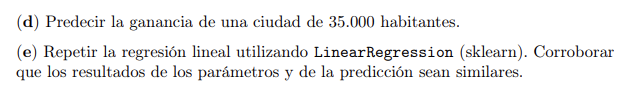

 W = 1.1930336441895937 
 B = -3.895780878311854


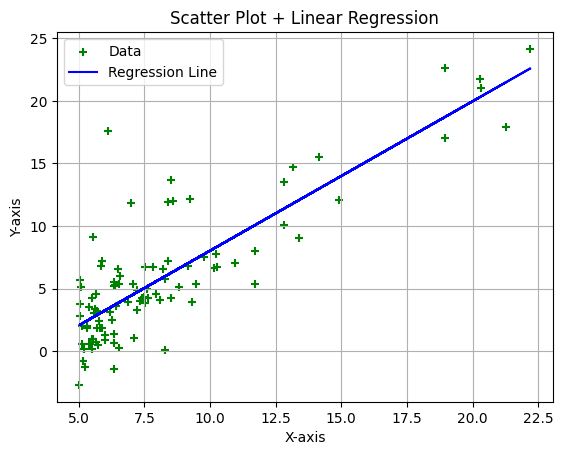

In [6]:
# Leo los datos del archivo .txt usando numpy
data_ejercicio_4 = np.loadtxt('mc.txt' , delimiter=',')

#=======================================================================
# Ejercicio A
#=======================================================================
    
# A partir de un objeto regressor ajusto a los datos del archivo
linear_regressor_ejercicio_4 = regressor()
linear_regressor_ejercicio_4.fit_LinearRegresion(data_ejercicio_4[:,0].reshape(-1,1),data_ejercicio_4[:,1].reshape(-1,1))

print(' W = %s' %linear_regressor_ejercicio_4.weights ,'\n','B = %s'% linear_regressor_ejercicio_4.bias )


#=======================================================================
# Ejercicio B
#=======================================================================
# Armo la recta de regresion con los X originales
regression_line = linear_regressor_ejercicio_4.predict(data_ejercicio_4[:,0].reshape(-1,1))

# Grafico
plt.figure()
plt.scatter(data_ejercicio_4[:,0],data_ejercicio_4[:,1],marker = '+',color='green',label ='Data')
plt.plot(data_ejercicio_4[:,0].reshape(-1,1),regression_line,color='blue',label='Regression Line')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot + Linear Regression')
plt.grid(True)
plt.legend()

plt.show()

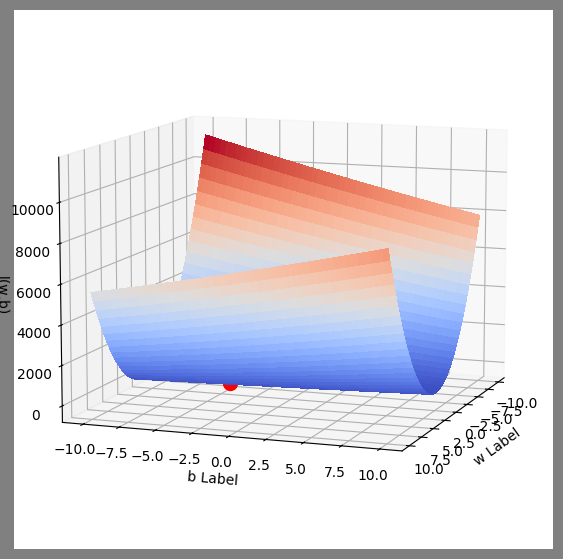

 W = 1.1930336441895937    &     W_min = 1.182364729458918 
 B = -3.895780878311854    &    B_min = -3.8276553106212425


In [7]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#=======================================================================
# Ejercicio C
#=======================================================================

fig = plt.figure(figsize=(10, 7),facecolor='gray')
ax = fig.add_subplot(111, projection='3d')

N = 500
w = np.linspace(-10, 10, N)
b = np.linspace(-10, 10, N)
W, B = np.meshgrid(w, b)
funcion_costo = ((data_ejercicio_4[:,1] - (np.dot(W.reshape(-1,1),data_ejercicio_4[:,0].reshape(1,-1)) + B.reshape(-1,1)))**2).mean(axis=1)
funcion_costo = funcion_costo.reshape(W.shape)

# Busco el minimo de la funcion costo graficada para compararlo con la solucion encontrada por el regresor
minimo_funcion_costo = np.argmin(funcion_costo)
W_min = W.reshape(-1)[minimo_funcion_costo]
B_min = B.reshape(-1)[minimo_funcion_costo]

# Calculo la funcion costo para el clasificador entrenado
funcion_costo_clasificador = ((data_ejercicio_4[:,1] - (np.dot(linear_regressor_ejercicio_4.weights,data_ejercicio_4[:,0].reshape(1,-1)) + linear_regressor_ejercicio_4.bias))**2).mean(axis=1)

# Grafico la superficie de la funcion costo
ax.plot_surface(W, B, funcion_costo, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Grafico el punto correspondiente al clasificador
ax.scatter(linear_regressor_ejercicio_4.weights, linear_regressor_ejercicio_4.bias, funcion_costo_clasificador, c='r', marker='o',s=100)

ax.view_init(elev=10, azim=20)
ax.set_xlabel('w Label')
ax.set_ylabel('b Label')
ax.set_zlabel('l(w,b)')
plt.show()


print(' W = %s' %linear_regressor_ejercicio_4.weights,'   &   ',' W_min = %s' %W_min,'\n','B = %s'%linear_regressor_ejercicio_4.bias,'   &   ','B_min = %s'%B_min  )



In [8]:
#=======================================================================
# Ejercicio D
#=======================================================================
# Realizo la prediccion utilizando el metodo predict del regresor
prediction = linear_regressor_ejercicio_4.predict(3.5)
print("La ganancia para 35.000 habitantes predecidad es %.2f"% prediction)

La ganancia para 35.000 habitantes predecidad es 0.28


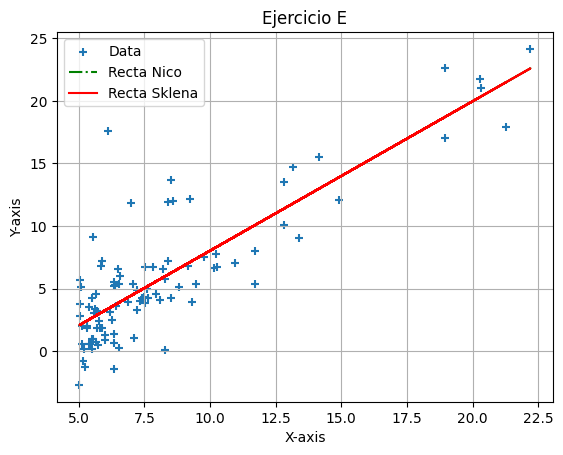

In [9]:
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

#=======================================================================
# Ejercicio E
#=======================================================================

# Crear un modelo de regresión lineal y entreno el modelo con los datos
model = LinearRegression()
model.fit(data_ejercicio_4[:,0].reshape(-1, 1) , data_ejercicio_4[:,1].reshape(-1, 1))

# Armo la recta de regresion con los X de los datos
regression_line_2= model.predict(data_ejercicio_4[:,0].reshape(-1, 1))

# Grafico
plt.figure()  

plt.scatter(data_ejercicio_4[:,0],data_ejercicio_4[:,1],marker='+',label='Data')
plt.plot(data_ejercicio_4[:,0], regression_line,linestyle='-.', color='green',label = 'Recta Nico')
plt.plot(data_ejercicio_4[:,0], regression_line_2,linestyle='-', color='red', label = 'Recta Sklena')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Ejercicio E')
plt.legend()  # Show legend
plt.grid(True)

plt.show()

# **Ejercicio 5**
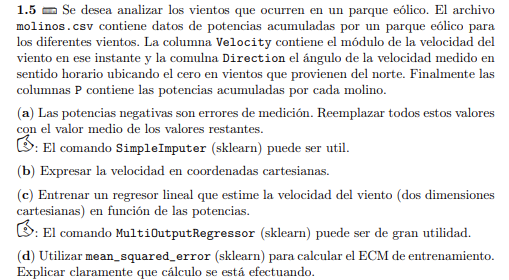

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Leo los datos del archivo .csv generando un DataFrame con Pandas
df_molinos = pd.read_csv('molinos.csv')
# Print DataFrame
#print(df_molinos)

#=======================================================================
# Ejercicio A
#=======================================================================
# Reemplazo los valores negaticos con la media de las potencias restantes
# Identifico los valores negativos y creo una mascara
negative_mask = df_molinos < 0
# Reemplazo los valores negativos utilizando la mascara con Nan
df_molinos[negative_mask] = np.nan
# Inicializo el SimpleImputer con estrategia 'Mean'
imputer = SimpleImputer(strategy='mean')
# Trasnformoe el Dataframe ejecutando el SimpleImputer. Este reemplazara todos los Nan por la media del resto de valores.
df_molinos = pd.DataFrame(imputer.fit_transform(df_molinos), columns = imputer.get_feature_names_out())

assert(np.sum(df_molinos.values < 0)==0) # Si hay algun valor negativo en el DataFrame se dispara un error


#=======================================================================
# Ejercicio B
#=======================================================================
# Extraigo el modulo de la velocidad y la direccion y calculo la velocidad en coordenadas cartesianas
velocidad = df_molinos['Velocity'].values
direccion = df_molinos['Direction'].values
velocidad_cartesianas = np.vstack((velocidad*np.sin(np.radians(direccion)), velocidad*np.cos(np.radians(direccion)))).T

#=======================================================================
# Ejercicio C
#=======================================================================
potencias = df_molinos.iloc[:, :43].values

# Para calcular la regresion lineal utilizo mi modelo propio y el de sklearn.

# Regresor Propio
linear_regressor_velocity_1 = regressor()
linear_regressor_velocity_1.fit_LinearRegresion(potencias , velocidad_cartesianas)
predictions_1 = linear_regressor_velocity_1.predict(potencias)
mse_1 = mean_squared_error(velocidad_cartesianas,predictions_1)

# Regresor Sklearn
model = LinearRegression()
linear_regressor_velocity_2 = MultiOutputRegressor(model)
linear_regressor_velocity_2.fit(potencias , velocidad_cartesianas)
predictions_2 = linear_regressor_velocity_2.predict(potencias)
mse_2 = mean_squared_error(velocidad_cartesianas,predictions_2)

# Muestro los resultados de los mse para cada modelo utilizado
print('Los errores cuadraticos medios de cada prediccion son MSE_1 = %.2f  y  MSE_2 = %.2f' % (mse_1, mse_2))


Los errores cuadraticos medios de cada prediccion son MSE_1 = 22.04  y  MSE_2 = 22.04


### (d) Utilizar mean_squared_error (sklearn) para calcular el ECM de entrenamiento. Explicar claramente que cálculo se está efectuando:

El calculo que esta efectuando la funcion anterior es la estimacion de la media del error cuadratico medio. Es decir, sobre cada punto calcula el error cuadratico y leugo calcula el promedio de todos los errores.

$$ MSE = \frac{1}{n \cdot d} \sum_{i=1}^n \sum_{j=1}^d (y^j_i - \hat{y}^j_i)^2 $$

# **Ejercicio 6**
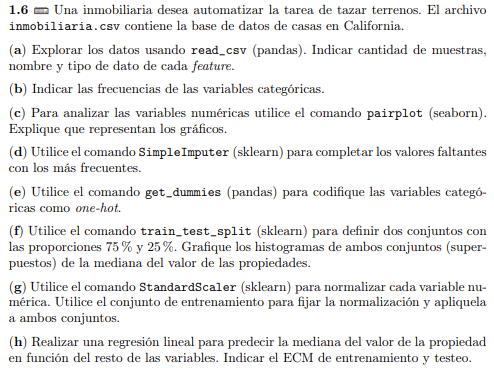

Ejercicio  A
Se tienen 20640 muestras y un total de 10 features.
Los tipos de dato de cada features son:
0) longitude:  float64
1) latitude:  float64
2) housing_median_age:  float64
3) total_rooms:  float64
4) total_bedrooms:  float64
5) population:  float64
6) households:  float64
7) median_income:  float64
8) median_house_value:  float64
9) ocean_proximity:  str


Ejercicio  B
Frecuencias Ocean_proximity:
ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: proportion, dtype: float64 

Ejercicio  C
Ejercicio  D
Cantidad de elementos nulos por categoria:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64 

Ejercicio  E
       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   Fals

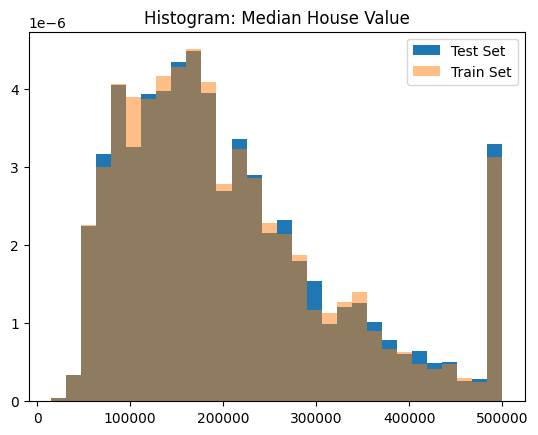

Ejercicio  H
Train) Mse = 4660339753.675119
Test) Mse = 4915706089.606630 


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Leo el dataframe
df_inmobiliaria = pd.read_csv('inmobiliaria.csv')
# Print DataFrame
#print(df_inmobiliaria)

#=======================================================================
# Ejercicio A
#=======================================================================

# Leo el CSV armando un DataFrame de python
df_inmobiliaria = pd.read_csv('inmobiliaria.csv')

n_muestras, n_features = df_inmobiliaria.shape
tipos_features = [type(df_inmobiliaria.iloc[0,i]).__name__ for i in range(n_features) ]
nombres_features = df_inmobiliaria.columns.tolist()

imprimir_titulo_ejercicio('A')
print('Se tienen %d muestras y un total de %d features.' %(n_muestras,n_features))
print('Los tipos de dato de cada features son:')
for i,(name,tipo) in enumerate(zip(nombres_features,tipos_features)):
    print('%d) %s: '% (i,name),tipo)
print('\n')


#=======================================================================
# Ejercicio B
#=======================================================================
frecuencia_ocean_proximity = df_inmobiliaria['ocean_proximity'].value_counts(normalize=True)

imprimir_titulo_ejercicio('B')
print('Frecuencias Ocean_proximity:')
print(frecuencia_ocean_proximity,'\n')

#=======================================================================
# Ejercicio C
#=======================================================================

imprimir_titulo_ejercicio('C')
#sns.pairplot(df_inmobiliaria)

# El comando genera una tabla de doble entrada donde en cada celda grafica el scatter plot de las variables correspondientes a dicha celda. 
# Con dichos graficos se puede analizar el nivel de correlacion que existe entre las diferentes variables.
# Sobre la diagonal se grafican los histogramas de cada variable


#=======================================================================
# Ejercicio D
#=======================================================================
# Completo los valores faltantes utilizando el Simpleimputer de sklearn
# Inicializo el SimpleImputer con estrategia 'most_frequent' para completar los valores faltantes con los mas frecuentes.
imputer = SimpleImputer(missing_values=pd.NA,strategy='most_frequent')
# Trasnformoe el Dataframe ejecutando el SimpleImputer.
df_inmobiliaria= pd.DataFrame(imputer.fit_transform(df_inmobiliaria), columns = df_inmobiliaria.columns)

imprimir_titulo_ejercicio('D')
print('Cantidad de elementos nulos por categoria:')
print(df_inmobiliaria.isnull().sum(),'\n')
#assert(np.sum(df_inmobiliaria.isnull().sum()) == 0)

#=======================================================================
# Ejercicio E
#=======================================================================

# El método get_dummies() en Pandas se utiliza para convertir variables categóricas en variables ficticias (dummy variables). 
dummie_variables = pd.get_dummies(df_inmobiliaria['ocean_proximity'])

imprimir_titulo_ejercicio('E')
print(dummie_variables,'\n')

# Elimino la columna original
df_inmobiliaria = df_inmobiliaria.drop('ocean_proximity', axis=1)

# Concateno las variables dummy al DataFrame original
df_inmobiliaria = pd.concat([df_inmobiliaria, dummie_variables], axis=1).astype(float)

#=======================================================================
# Ejercicio F
#=======================================================================

# La función train_test_split de scikit-learn se utiliza para dividir un conjunto de datos en dos partes: 
# un conjunto de entrenamiento(train set) y un conjunto de prueba(test set).

df_inmobiliaria_train, df_inmobiliaria_test= train_test_split(df_inmobiliaria,test_size=0.25,train_size=0.75)

imprimir_titulo_ejercicio('F')
#for i in range(df_inmobiliaria.shape[1] - dummie_variables.shape[1]):
#    plt.figure()
#    #plt.subplot(df_inmobiliaria_train.shape[1],1,i+1)
#    plt.hist(df_inmobiliaria_test.iloc[:, i].values,density=True,label = "Test Set")
#    plt.hist(df_inmobiliaria_train.iloc[:, i].values,density=True,alpha=0.5,label = 'Train Set')
#    plt.title(df_inmobiliaria.columns[i])
#    plt.legend()

plt.figure()
plt.hist(df_inmobiliaria_test.loc[:, 'median_house_value'].values,bins=30,density=True,label = "Test Set")
plt.hist(df_inmobiliaria_train.loc[:, 'median_house_value'].values,bins=30,density=True,alpha=0.5,label = 'Train Set')
plt.title('Histogram: Median House Value')
plt.legend()
plt.show()

#=======================================================================
# Ejercicio G
#=======================================================================
X_df_train = df_inmobiliaria_train.drop('median_house_value', axis=1)
Y_train = df_inmobiliaria_train.loc[:,'median_house_value'].values.reshape(-1,1)

X_df_test = df_inmobiliaria_test.drop('median_house_value', axis=1)
Y_test = df_inmobiliaria_test.loc[:,'median_house_value'].values.reshape(-1,1)

# Creo una instancia de StandardScaler para X e Y
scaler_X = StandardScaler()

# Ajusto el scaler al set de entrenamiento
scaler_X.fit(X_df_train)

# Finalmente, transformo los sets de datos con el scaler
X_train_scaled = scaler_X.transform(X_df_train)

X_test_scaled = scaler_X.transform(X_df_test)

#=======================================================================
# Ejercicio H
#=======================================================================
linear_regressor_MedianHouseValue = LinearRegression()
linear_regressor_MedianHouseValue.fit(X_train_scaled , Y_train)

predictions_train = linear_regressor_MedianHouseValue.predict(X_train_scaled)
mse_train = mean_squared_error(predictions_train,Y_train)


predictions_test = linear_regressor_MedianHouseValue.predict(X_test_scaled)
mse_test = mean_squared_error(predictions_test,Y_test)

imprimir_titulo_ejercicio('H')
print('Train) Mse = %f\nTest) Mse = %f ' %(mse_train,mse_test))

# **Ejercicio 7**
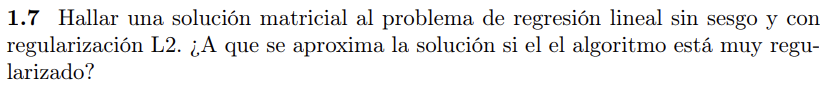

### Desarrollo:
Planteo el riesgo empirico agregando el terminco de regularizacion $L_2$:
$$  J (W) = \frac{1}{n} ||XW _Y||^2 + \frac{\lambda}{n \cdot 2} ||W||^2 $$

$$ J(W) = \frac{1}{n}W^TX^TXW - \frac{2}{n} W^TX^TY + \frac{1}{n} Y^TY+ \frac{\lambda}{2n}WW^T $$

Ahora calculo el gradiente e igualo a 0 para encontrar el W que minimiza el riesgo empirico:

$$\nabla J(W) = \frac{2}{n} X^TXW - \frac{2}{n} X^TY + \frac{\lambda}{n}W = 0 $$

$$\left(2X^TX + \lambda I \right)W = 2 X^TY $$

Entonces finalmente se obtiene...

$$W = \left(2X^TX + \lambda I \right)^{-1} \cdot 2X^TY $$


Se observa que si el algoritmo esta muy regularizado, es decir, lambda es muy grande; la solucion se aproxima a $ W \approx \frac{2}{\lambda} X^TY$.Se puede ver que dentro del termino de la inversa gana $\lambda I$ y en consecuencia se aproxima la pseudoinversa a una matriz proporcional a la traspuesta de la matriz X.

# **Ejercicio 8** 

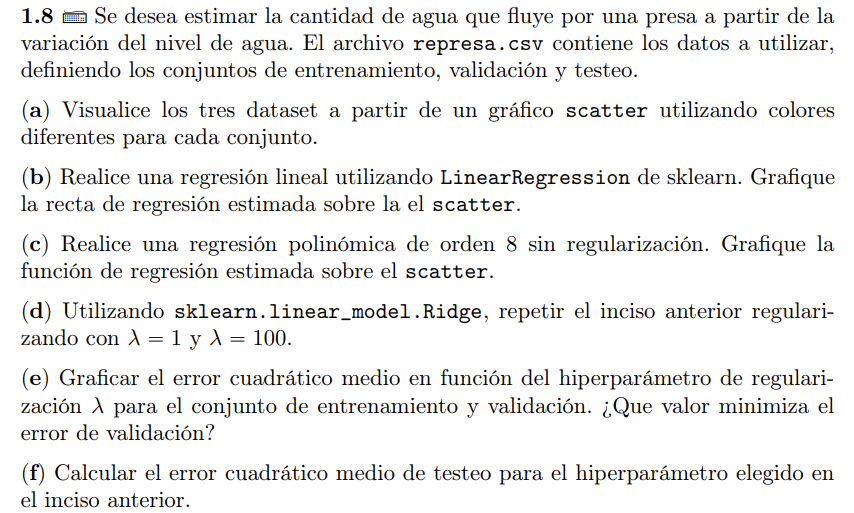

       Xtrain     ytrain       Xval       yval      Xtest      ytest
0  -15.936758   2.134311 -16.746536   4.170202 -33.318004   3.316890
1  -29.152979   1.173257 -14.577471   4.067263 -37.912164   5.397690
2   36.189549  34.359109  34.515759  31.873068 -51.206938   0.130430
3   37.492187  36.837955 -47.010076  10.623656  -6.132596   6.192598
4  -48.058829   2.808965  36.975119  31.836021  21.261183  17.088487
5   -8.941458   2.121072 -40.686110   4.959370 -40.319529   0.799508
6   15.307793  14.710268  -4.472011   4.451599 -14.541532   2.824792
7  -34.706266   2.614184  26.533635  22.276318  32.559760  28.621233
8    1.389154   3.740172 -42.797683  -0.000044  13.393433  17.046391
9  -44.383760   3.731691  25.374099  20.503802  44.209886  55.384373
10   7.013502   7.627659 -31.109554   3.858345  -1.142678   4.079367
11  22.762749  22.752428  27.311769  19.365053 -12.766861   8.270398
12        NaN        NaN  -3.263862   4.883763  34.054505  31.323551
13        NaN        NaN  -1.81827

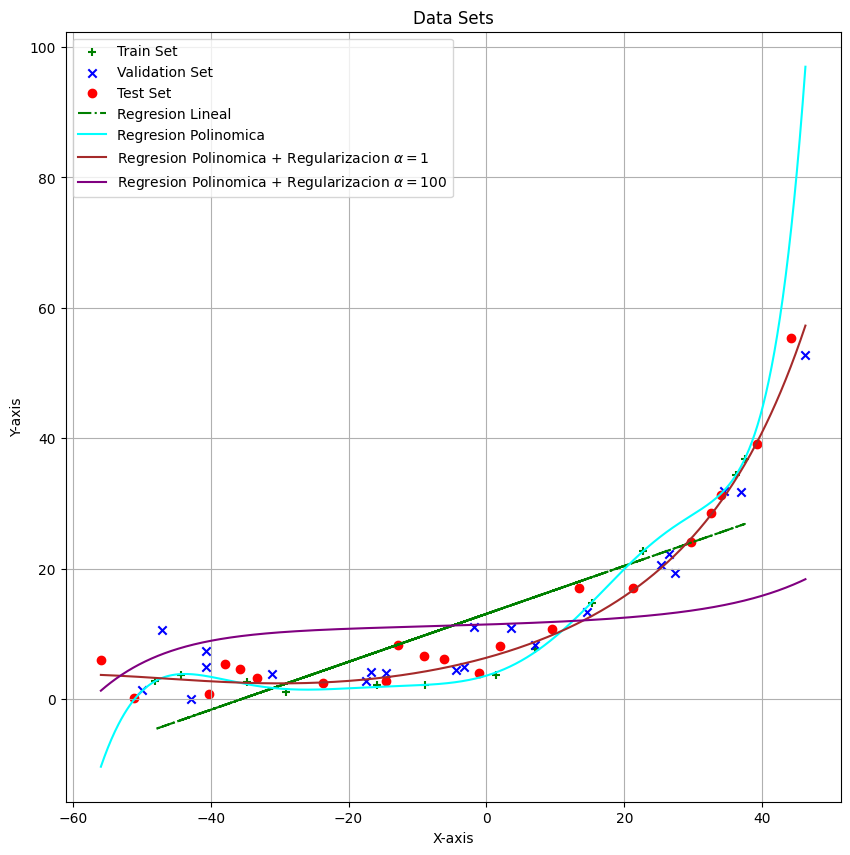

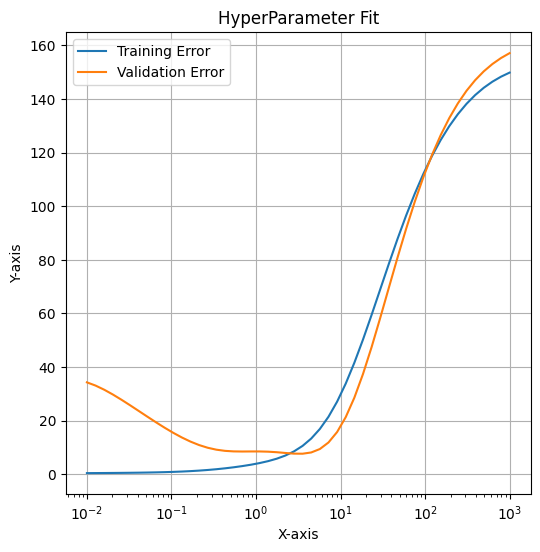

Ejercicio  E
Alpha_min = 3.5565
MSE_{test} = 8.3792


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Leo el dataframe
df_represa = pd.read_csv('represa.csv')
print(df_represa)

#=======================================================================
# Ejercicio A 
#=======================================================================

# Extraigo los sets de datos del dataframe

# Train Set
x_train = df_represa.Xtrain.values[~np.isnan(df_represa.Xtrain.values)].reshape(-1, 1)
y_train = df_represa.ytrain.values[~np.isnan(df_represa.ytrain.values)].reshape(-1, 1)

# Validation Set
x_val = df_represa.Xval.values.reshape(-1, 1)
y_val = df_represa.yval.values.reshape(-1, 1)

# Test Set
x_test = df_represa.Xtest.values.reshape(-1, 1)
y_test = df_represa.ytest.values.reshape(-1, 1)



#=======================================================================
# Ejercicio B 
#=======================================================================

linear_regressor_ejercicio_8 = LinearRegression()
linear_regressor_ejercicio_8.fit(x_train ,y_train )
y_predict_linear = linear_regressor_ejercicio_8.predict(x_train)



#=======================================================================
# Ejercicio C 
#=======================================================================

# Transformo el vector X agregando las potencias segun el grado del polinomio
poly8 = PolynomialFeatures(degree=8,include_bias=False)
x_poly8 = poly8.fit_transform(x_train)

# Creo una instancia de StandardScaler para X 
scaler_x_poly = StandardScaler()

# Ajusto el scaler al set de entrenamiento
scaler_x_poly.fit(x_poly8)

# Finalmente, transformo los sets de datos con el scaler
x_poly8_scaled = scaler_x_poly.transform(x_poly8)

poly8_regressor_ejercicio8 = LinearRegression()
poly8_regressor_ejercicio8.fit(x_poly8_scaled,y_train)

x_plot = np.linspace(np.min(x_test),np.max(x_val),1000).reshape(-1,1)
x_plot_poly = poly8.fit_transform(x_plot)

# Realizo las predicciones para graficar el polinomio estimado. 
# Antes de pasar los datos por el predictor es necesario normalizarlos con la misma transformacion que el set de entrenamiento
y_plot_poly8 = poly8_regressor_ejercicio8.predict(scaler_x_poly.transform(x_plot_poly))



#=======================================================================
# Ejercicio D
#=======================================================================

# Repito utilizando ridge el cual realiza la regresion lineal agregando el termino de regularizacion L2
# Utilizo alpha = 10 y alpha = 100

poly8_reg10_regressor_ejercicio8 = Ridge(alpha = 1)
poly8_reg10_regressor_ejercicio8.fit(x_poly8_scaled,y_train)

y_plot_poly8_reg10 = poly8_reg10_regressor_ejercicio8.predict(scaler_x_poly.transform(x_plot_poly))

poly8_reg100_regressor_ejercicio8 = Ridge(alpha = 100)
poly8_reg100_regressor_ejercicio8.fit(x_poly8_scaled,y_train)

y_plot_poly8_reg100 = poly8_reg100_regressor_ejercicio8.predict(scaler_x_poly.transform(x_plot_poly))
#=======================================================================
# Graficos A, B, C y D
#=======================================================================

# Grafico los resultados:
plt.figure(figsize=(10, 10))

# Scatter plots de los sets
plt.scatter(x_train,y_train,marker = '+',color = 'green',label='Train Set')
plt.scatter(x_val,y_val,marker='x',color='blue',label='Validation Set')
plt.scatter(x_test,y_test,marker='o',color='red',label="Test Set")

# Recta de regresion
plt.plot(x_train,y_predict_linear,color='green',linestyle='-.',label = 'Regresion Lineal')

# Regresion Polinomica
plt.plot(x_plot,y_plot_poly8,color='cyan',label='Regresion Polinomica')

# Regresion Polinomica + Regularizacion
plt.plot(x_plot,y_plot_poly8_reg10,color='brown',label='Regresion Polinomica + Regularizacion $\\alpha= 1$')
plt.plot(x_plot,y_plot_poly8_reg100,color='purple',label='Regresion Polinomica + Regularizacion $\\alpha = 100$')

# plot config
plt.title("Data Sets")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.legend()
plt.show()


#=======================================================================
# Ejercicio E
#=======================================================================

# Creo  un vector de alphas en escala logaritmica y para cada uno armo un modelo, lo entreno y calculo los mse de entrenamiento y validacion
alphas = np.logspace(-2,3,50)
mse_train = np.zeros(alphas.shape)
mse_val = np.zeros(alphas.shape)

for i,a in enumerate(alphas):
    poly8_regressor = Ridge(alpha = a)
    poly8_regressor.fit(x_poly8_scaled,y_train)

    y_predict_train = poly8_regressor.predict(scaler_x_poly.transform(x_poly8))
    y_predict_val = poly8_regressor.predict(scaler_x_poly.transform( poly8.fit_transform(x_val) ))

    mse_train[i] = mean_squared_error(y_train,y_predict_train)
    mse_val[i] = mean_squared_error(y_val,y_predict_val)


# Grafico los resultados

plt.figure(figsize=(6,6))

plt.plot(alphas,mse_train,label='Training Error')
plt.plot(alphas,mse_val,label='Validation Error')

plt.xscale('log',base = 10)
#plt.yscale('log',base = 10)

plt.title("HyperParameter Fit")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()



#=======================================================================
# Ejercicio F
#=======================================================================

# Tomo el alpha que minimiza el error de validacion y creo un nuevo regresor con regularizacion con dicho alpha
alpha_min = alphas[np.argmin(mse_val)]
best_poly8_regressor = Ridge(alpha = alpha_min)
best_poly8_regressor.fit(x_poly8_scaled,y_train)

# Evaluo el modelo utilizando el test set y calculo el error cuadratico medio
y_predict_test = best_poly8_regressor.predict(scaler_x_poly.transform(poly8.fit_transform(x_test)))
mse_test = mean_squared_error(y_predict_test,y_test)
imprimir_titulo_ejercicio('E')
print('Alpha_min = %.4f' %(alpha_min))
print('MSE_{test} = %.4f'%(mse_test))